In [1]:
# <!-- collapse=False -->

from __future__ import division
% matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Introduction to basic concepts

$V$ and $I$ are used to indicate phasor representations of sinusoidal voltages and currents. $E$ is used to represent generated voltage or electromotive force (emf). $V$ is often used to measure a potential difference between two points. $v$ is used to represent the instantaneous voltage between two points.

Let voltage be defined as the following :

$v = 155.563491861 \cos(\omega t + \phi)$

$i = 7.07106781187 \cos\omega t$

Let us plot this and see what it looks like. 


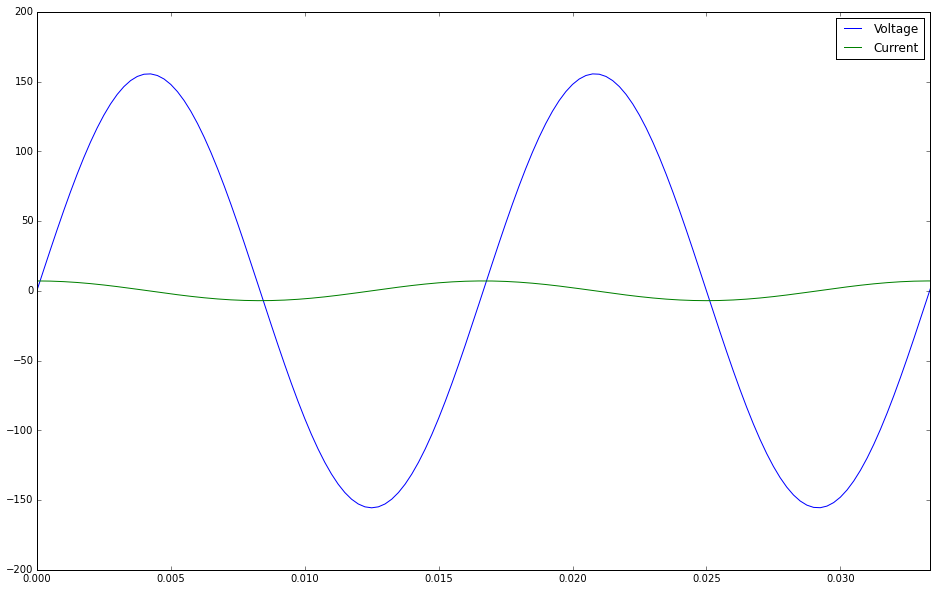

In [2]:
# <!-- collapse=True -->

f0 = 60 # Hz (frequency)
phi = -np.pi/2 # phase shift

Av = 155.563491861 # voltage peak
Ai = 7.07106781187 # current peak

fs = 4000 # steps
t = np.arange(0.000, 6/f0, 1.0/fs) # plot from 0 to .02 secs

v = Av * np.cos(2 * np.pi * f0 * t + phi)
i = Ai * np.cos(2 * np.pi * f0 * t )

fig, ax = plt.subplots(1,1,figsize = (16,10))
ax.plot(t, v, label = 'Voltage')
ax.plot(t, i, label = 'Current')
ax.axis([0, 2/f0, -200, 200])

ax.legend();


In [3]:
# <!-- collapse=True -->

def rms(x):
    return np.sqrt(np.mean(x**2))


We can calculate the maximum, minimum and the RMS value as follows

In [4]:
# <!-- collapse=True -->

print 'Maximum', max(v)
print 'Minimum', min(v)
print 'RMS', rms(v)

print 'Ratio max/rms', max(v)/rms(v)

try: 
    np.testing.assert_approx_equal(np.sqrt(2), max(v)/rms(v))
except:
    print 'Numbers not equal'
else:
    print 'Maximum value = √2 x RMS value'

Maximum 155.563491861
Minimum -155.563491861
RMS 110.0
Ratio max/rms 1.41421356237
Maximum value = √2 x RMS value


$|V|$ is used to represent magnitude of the phasors.

$|V| = 110 = \frac{155.5634}{\sqrt{2}} $

The RMS value of $v$ is what is read by a voltmeter

# Expression for power

Let voltage and current be expressed by

$v_{an} = V_{max} \cos(\omega t + \theta)$

$i_{an} = I_{max} \cos\omega t $

Instantaneous power is calculated by $p_{a} = v_{an} \times i_{an}$. If we plot the above equations, assuming $\theta = -\frac{\pi}{6}$, we get the following.

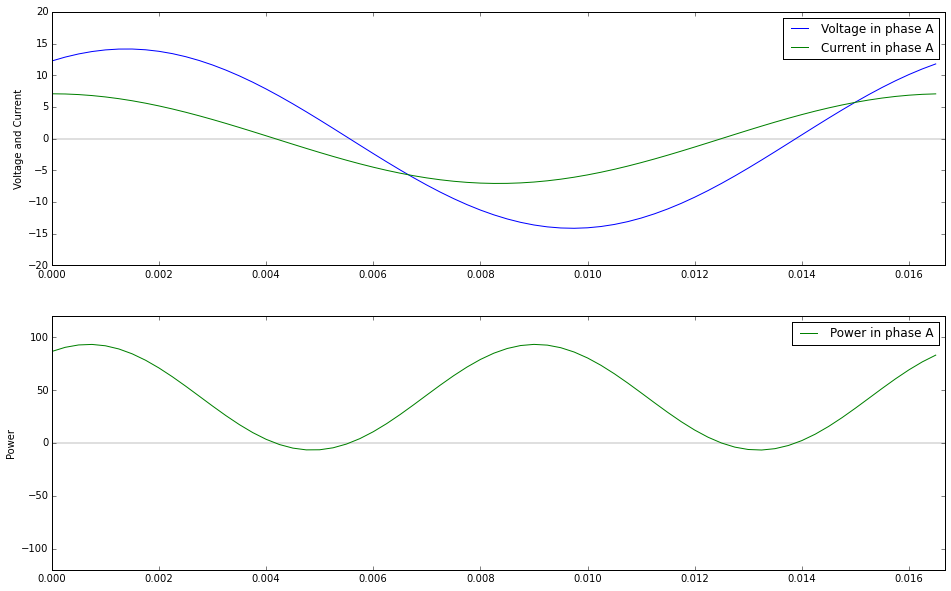

In [5]:
# <!-- collapse=True -->

f0 = 60 # Hz (frequency)
phi = -np.pi/6 # phase shift

Av = 10*np.sqrt(2) # voltage peak
Ai = 5*np.sqrt(2) # current peak

fs = 4000 # steps
t = np.arange(0.000, 1/f0, 1.0/fs) # plot from 0 to .02 secs

v = Av * np.cos(2 * np.pi * f0 * t + phi)
i = Ai * np.cos(2 * np.pi * f0 * t )
fig, axs = plt.subplots(2,1,figsize = (16,10))

ax1 = axs[0]

ax1.axhline(linewidth=0.25, color='black')
ax1.axvline(linewidth=0.25, color='black')

ax1.plot(t, v, label = 'Voltage in phase A')
ax1.plot(t, i, label = 'Current in phase A')
ax1.set_ylabel('Voltage and Current')

ax1.axis([0, 1/f0, -20, 20]);
ax1.legend()


ax2 = axs[1]

ax2.axhline(linewidth=0.25, color='black')
ax2.axvline(linewidth=0.25, color='black')

ax2.plot(t, v*i, label = 'Power in phase A', color='g')

ax2.set_ylabel('Power')
# for tl in ax2.get_yticklabels():
#     tl.set_color('g')
ax2.legend()
ax2.axis([0, 1/f0, -120, 120]);


We can decompose the instantaneous power following the steps below. 

$v_{an} = V_{max} \cos(\omega t  + \theta)$

$i_{an} = I_{max} \cos\omega t $

$p = v_{an} \times i_{an}$

$p = V_{max} \cos(\omega t + \theta) \times I_{max} \cos\omega t $

$p = V_{max}I_{max} \cos(\omega t + \theta) \times \cos\omega t $

We know that, 

$2\cos \theta \cos \varphi = {{\cos(\theta - \varphi) + \cos(\theta + \varphi)}}$


$p = V_{max}I_{max} \cos(\omega t + \theta) \cos\omega t$

$p = \frac{V_{max}I_{max}}{2}({{\cos(\omega t + \theta - \omega t) + \cos(\omega t + \theta + \omega t)}})$

$p = \frac{V_{max}I_{max}}{2}({{\cos\theta + \cos(2\omega t + \theta )}})$

The second $\cos$ term is of the following form,

$\cos(\alpha \pm \beta) = \cos \alpha \cos \beta \mp \sin \alpha \sin \beta\,$

$p = \frac{V_{max}I_{max}}{2}({{\cos\theta + \cos 2\omega t \cos \theta - \sin 2\omega t \sin \theta}})$


$p = \frac{V_{max}I_{max}}{2}({{\cos\theta (1 + \cos 2\omega t)  - \sin 2\omega t \sin \theta}})$

$p = \frac{V_{max}I_{max}}{2} \cos\theta (1 + \cos 2\omega t)  - \frac{V_{max}I_{max}}{2} \sin 2\omega t \sin \theta $

$\theta$ is the phase angle of one of the phasors. In our case, $\theta$ is the phase angle of Voltage, when the angle of Current is 0

Assuming $\theta = -\theta$, 

$\cos(\theta) = \cos(-\theta) $

$\sin(\theta) =  - \sin(-\theta) $

Hence,

$p = \frac{V_{max}I_{max}}{2} \cos\theta (1 + \cos 2\omega t) + \frac{V_{max}I_{max}}{2} \sin 2\omega t \sin \theta $

We see that the sign of the first term remains unaffected by the sign of $\theta$

Let us plot the two parts of this equation.

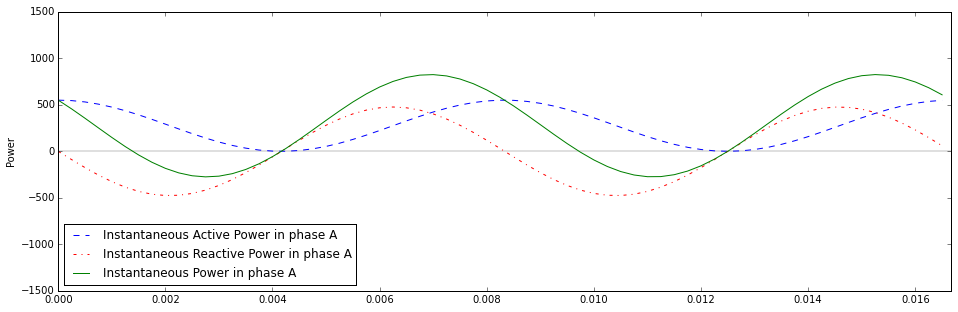

In [6]:
# <!-- collapse=True -->

f0 = 60 # Hz (frequency)
phi = -np.pi/3 # phase shift

Av = 110*np.sqrt(2) # voltage peak
Ai = 5*np.sqrt(2) # current peak

fs = 4000 # steps
t = np.arange(0.000, 1/f0, 1.0/fs) # plot from 0 to .02 secs

v = Av * np.cos(2 * np.pi * f0 * t + phi)
i = Ai * np.cos(2 * np.pi * f0 * t )
fig, axs = plt.subplots(1,1,figsize = (16,5))

# ax1 = axs[0]

# ax1.axhline(linewidth=0.25, color='black')
# ax1.axvline(linewidth=0.25, color='black')

# ax1.plot(t, v, label = 'Voltage in phase A')
# ax1.plot(t, i, label = 'Current in phase A')
# ax1.set_ylabel('Voltage and Current')

# ax1.axis([0, 1/f0, -200, 200]);
# ax1.legend(loc='lower left')

ax2 = axs

ax2.axhline(linewidth=0.25, color='black')
ax2.axvline(linewidth=0.25, color='black')

#$p = \frac{V_{max}I_{max}}{2} \cos\theta (1 + \cos 2\omega t) 
#                         + \frac{V_{max}I_{max}}{2} \sin 2\omega t \sin \theta $

p_R = Av*Ai/2*(np.cos(phi) * (1 + np.cos(2 * 2 * np.pi * f0 * t)))
p_X = Av*Ai/2*(np.sin(phi) * (np.sin(2 * 2 * np.pi * f0 * t)))

ax2.plot(t, p_R, label = 'Instantaneous Active Power in phase A', linestyle='--', color = 'b')
ax2.plot(t, p_X, label = 'Instantaneous Reactive Power in phase A', linestyle='-.', color = 'r')

#ax2.plot(t, v*i, label = 'Power in phase A', color='g')
ax2.plot(t, p_R+p_X, label = 'Instantaneous Power in phase A', color='g')


ax2.set_ylabel('Power')
ax2.legend(loc='lower left')
ax2.axis([0, 1/f0, -1500, 1500]);


The blue line (active power) is always positve and has an average value of $\frac{V_{max}I_{max}}{2}\cos\theta$. If we use RMS values, we get

$P = \frac{V_{max}}{\sqrt{2}} \frac{I_{max}}{\sqrt{2}} \cos\theta$

$P = |V||I|\cos\theta$ 

The average value of the red line (reactive power) is equal to zero. 

The maximum value of the instantaneous reactive power is $\frac{V_{max}I_{max}}{2} \sin \theta $

Or,

$Q = |V||I|\sin\theta$ 


# So why is it called real power? 

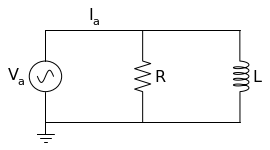

In [7]:
# <!-- collapse=True -->

import SchemDraw as schem
import SchemDraw.elements as e

d = schem.Drawing()

V1 = d.add( e.SOURCE_SIN, label='$V_{a}$' )
L1 = d.add( e.LINE, d='right', label='$I_{a}$')
d.push()
R = d.add( e.RES, d='down', botlabel='$R$' )
d.pop()
d.add( e.LINE, d='right' )
d.add( e.INDUCTOR2, d='down', botlabel='$L$' )
d.add( e.LINE, to=V1.start )
d.add( e.GND )
d.draw()


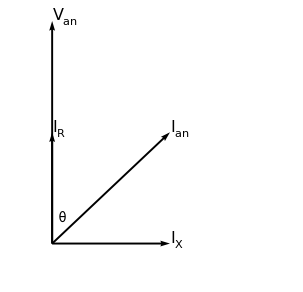

In [8]:
# <!-- collapse=True -->

fig, ax = plt.subplots(1,1,figsize = (4,4))

soa =np.array([[0,0,0,5],[0,0,0,10],[0,0,5,0],[0,0,5,5]]) 
X,Y,U,V = zip(*soa)
ax = plt.gca()
ax.quiver(X,Y,U,V,angles='xy',scale_units='xy',scale=1)
ax.set_xlim([-1,10])
ax.set_ylim([-1,10])

ax.text(5, 0, r'$I_{X}$')
ax.text(0, 5, r'$I_{R}$')
ax.text(5, 5, r'$I_{an}$')
ax.text(0, 10, r'$V_{an}$')
ax.text(0.25, 1, r'$\theta$')

ax.axis('off');

We know that $\theta$ is the phase difference between the Voltage and Current. 

$p = \frac{V_{max}I_{max}}{2} \cos\theta (1 + \cos 2\omega t) + \frac{V_{max}I_{max}}{2} \sin 2\omega t \sin \theta $

The first term can be rewritten as

$\frac{V_{max}I_{max}}{2} \cos\theta (1 + \cos 2\omega t)$

$V_{max}I_{max} \cos\theta \cos^2 \omega t$

$V_{max}\cos \omega t \times I_{max}\cos\theta\cos \omega t$

Similarly the second term can be rewritten as 

$V_{max}\cos \omega t \times I_{max}\sin \omega t \sin\theta$


From the above figure we can see that power can be written as 

$p_{active} = v_{a} \times i_{R}$

$p_{reactive} = v_{a} \times i_{X}$

# Special cases

$P$ or active power or real power is the power that is dissipated in the resistor, in the form of heat energy. $Q$ or reactive power is the power that oscillates between the source and inductor or the capacitor. 
And $\theta$ is determined by the nature of the impedance.

Let's look at three cases

### Case 1 : $\theta$ is zero

When we assume $\theta$ is zero, the load is purely resistive

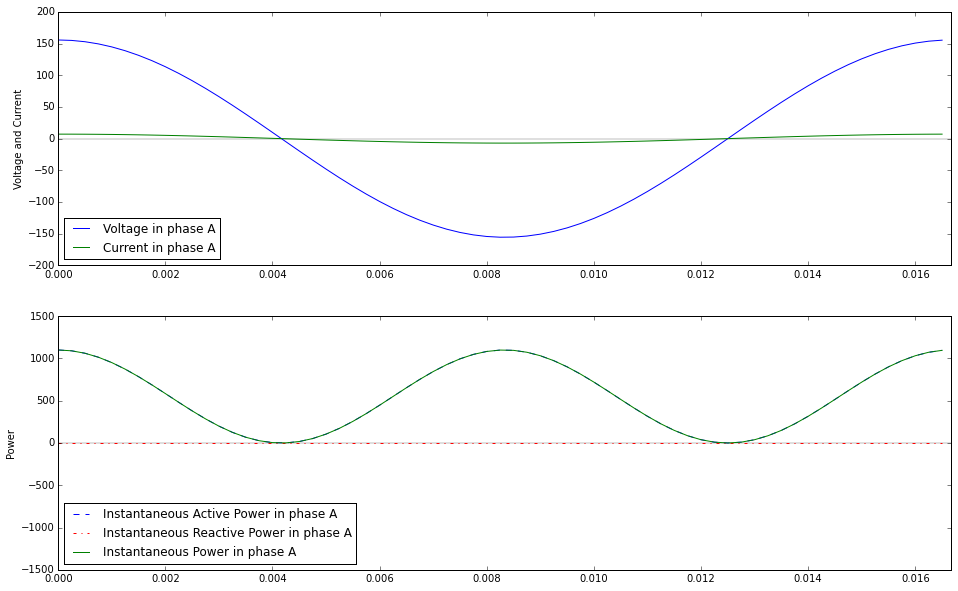

In [9]:
# <!-- collapse=True -->

f0 = 60 # Hz (frequency)
phi = 0 # phase shift

Av = 110*np.sqrt(2) # voltage peak
Ai = 5*np.sqrt(2) # current peak

fs = 4000 # steps
t = np.arange(0.000, 1/f0, 1.0/fs) # plot from 0 to .02 secs

v = Av * np.cos(2 * np.pi * f0 * t + phi)
i = Ai * np.cos(2 * np.pi * f0 * t )
fig, axs = plt.subplots(2,1,figsize = (16,10))


ax1 = axs[0]

ax1.axhline(linewidth=0.25, color='black')
ax1.axvline(linewidth=0.25, color='black')

ax1.plot(t, v, label = 'Voltage in phase A')
ax1.plot(t, i, label = 'Current in phase A')
ax1.set_ylabel('Voltage and Current')

ax1.axis([0, 1/f0, -200, 200]);
ax1.legend(loc='lower left')

ax2 = axs[1]

ax2.axhline(linewidth=0.25, color='black')
ax2.axvline(linewidth=0.25, color='black')

#$p = \frac{V_{max}I_{max}}{2} \cos\theta (1 + \cos 2\omega t) 
#                         + \frac{V_{max}I_{max}}{2} \sin 2\omega t \sin \theta $

p_R = Av*Ai/2*(np.cos(phi) * (1 + np.cos(2 * 2 * np.pi * f0 * t)))
p_X = Av*Ai/2*(np.sin(phi) * (np.sin(2 * 2 * np.pi * f0 * t)))

ax2.plot(t, p_R, label = 'Instantaneous Active Power in phase A', linestyle='--', color = 'b')
ax2.plot(t, p_X, label = 'Instantaneous Reactive Power in phase A', linestyle='-.', color = 'r')

#ax2.plot(t, v*i, label = 'Power in phase A', color='g')
ax2.plot(t, p_R+p_X, label = 'Instantaneous Power in phase A', color='g')


ax2.set_ylabel('Power')
ax2.legend(loc='lower left')
ax2.axis([0, 1/f0, -1500, 1500]);


The Instantaneous power in the phase is equal to the active power. 

### Case 2 : $\theta$ is 90

When $\theta$ is 90, the load is purely inductive

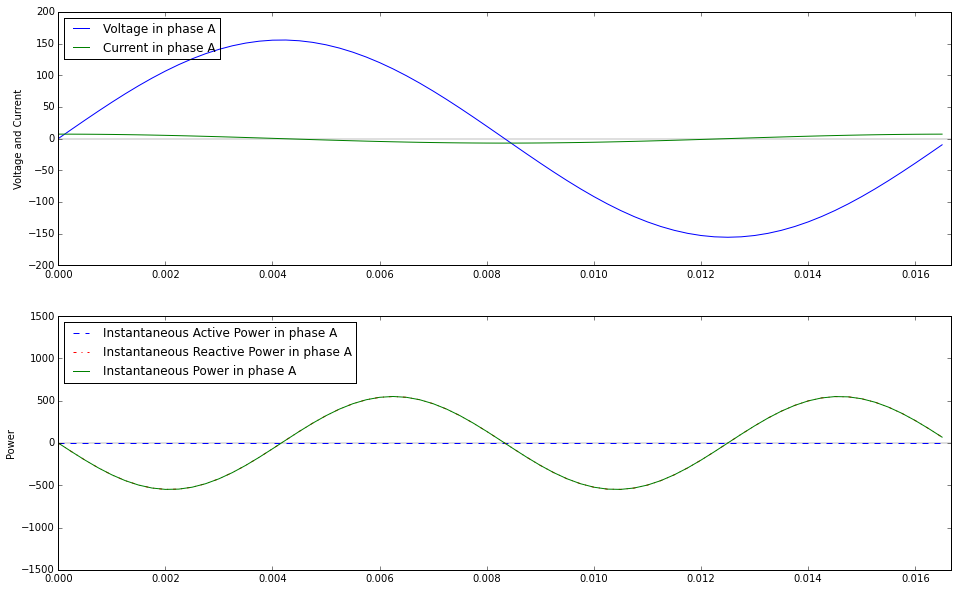

In [10]:
# <!-- collapse=True -->

f0 = 60 # Hz (frequency)
phi = -np.pi/2 # phase shift

Av = 110*np.sqrt(2) # voltage peak
Ai = 5*np.sqrt(2) # current peak

fs = 4000 # steps
t = np.arange(0.000, 1/f0, 1.0/fs) # plot from 0 to .02 secs

v = Av * np.cos(2 * np.pi * f0 * t + phi)
i = Ai * np.cos(2 * np.pi * f0 * t )
fig, axs = plt.subplots(2,1,figsize = (16,10))

ax1 = axs[0]

ax1.axhline(linewidth=0.25, color='black')
ax1.axvline(linewidth=0.25, color='black')

ax1.plot(t, v, label = 'Voltage in phase A')
ax1.plot(t, i, label = 'Current in phase A')
ax1.set_ylabel('Voltage and Current')

ax1.axis([0, 1/f0, -200, 200]);
ax1.legend(loc='upper left')

ax2 = axs[1]

ax2.axhline(linewidth=0.25, color='black')
ax2.axvline(linewidth=0.25, color='black')

#$p = \frac{V_{max}I_{max}}{2} \cos\theta (1 + \cos 2\omega t) 
#                         + \frac{V_{max}I_{max}}{2} \sin 2\omega t \sin \theta $

p_R = Av*Ai/2*(np.cos(phi) * (1 + np.cos(2 * 2 * np.pi * f0 * t)))
p_X = Av*Ai/2*(np.sin(phi) * (np.sin(2 * 2 * np.pi * f0 * t)))

ax2.plot(t, p_R, label = 'Instantaneous Active Power in phase A', linestyle='--', color = 'b')
ax2.plot(t, p_X, label = 'Instantaneous Reactive Power in phase A', linestyle='-.', color = 'r')

#ax2.plot(t, v*i, label = 'Power in phase A', color='g')
ax2.plot(t, p_R+p_X, label = 'Instantaneous Power in phase A', color='g')


ax2.set_ylabel('Power')
ax2.legend(loc='upper left')
ax2.axis([0, 1/f0, -1500, 1500]);


The Instantaneous power in the phase is equal to the reactive power. The power oscillates between the source and the inductive circuit.


### Case 3 : $\theta$ is -90

When $\theta$ is -90, the load is purely capacitive

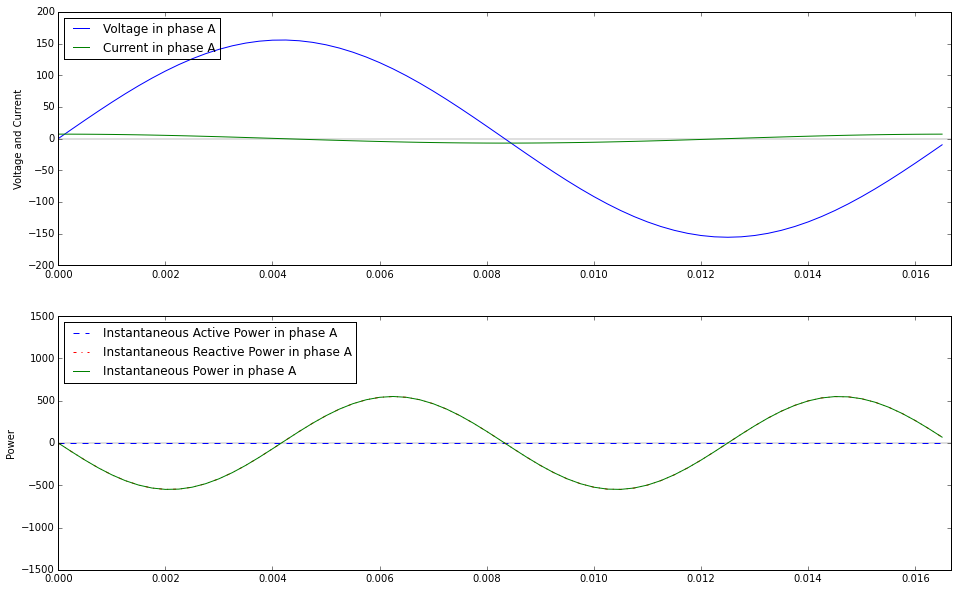

In [11]:
# <!-- collapse=True -->

f0 = 60 # Hz (frequency)
phi = -np.pi/2 # phase shift

Av = 110*np.sqrt(2) # voltage peak
Ai = 5*np.sqrt(2) # current peak

fs = 4000 # steps
t = np.arange(0.000, 1/f0, 1.0/fs) # plot from 0 to .02 secs

v = Av * np.cos(2 * np.pi * f0 * t + phi)
i = Ai * np.cos(2 * np.pi * f0 * t )
fig, axs = plt.subplots(2,1,figsize = (16,10))

ax1 = axs[0]

ax1.axhline(linewidth=0.25, color='black')
ax1.axvline(linewidth=0.25, color='black')

ax1.plot(t, v, label = 'Voltage in phase A')
ax1.plot(t, i, label = 'Current in phase A')
ax1.set_ylabel('Voltage and Current')

ax1.axis([0, 1/f0, -200, 200]);
ax1.legend(loc='upper left')

ax2 = axs[1]

ax2.axhline(linewidth=0.25, color='black')
ax2.axvline(linewidth=0.25, color='black')

#$p = \frac{V_{max}I_{max}}{2} \cos\theta (1 + \cos 2\omega t) 
#                         + \frac{V_{max}I_{max}}{2} \sin 2\omega t \sin \theta $

p_R = Av*Ai/2*(np.cos(phi) * (1 + np.cos(2 * 2 * np.pi * f0 * t)))
p_X = Av*Ai/2*(np.sin(phi) * (np.sin(2 * 2 * np.pi * f0 * t)))

ax2.plot(t, p_R, label = 'Instantaneous Active Power in phase A', linestyle='--', color = 'b')
ax2.plot(t, p_X, label = 'Instantaneous Reactive Power in phase A', linestyle='-.', color = 'r')

#ax2.plot(t, v*i, label = 'Power in phase A', color='g')
ax2.plot(t, p_R+p_X, label = 'Instantaneous Power in phase A', color='g')


ax2.set_ylabel('Power')
ax2.legend(loc='upper left')
ax2.axis([0, 1/f0, -1500, 1500]);


In a purely capacitive circuit, power oscillates between the source and electric field associated with the capacitor.

# Expression for complex power

We know from Euler's identity that, for any real number x 

$e^{jx} = \cos x +  j\sin x$

This means, we can write the above equations as :

$\cos\theta = \operatorname{Re}\{ e^{j \theta} \} $

$v = 155.563491861 \cos(\omega t + \theta)$

$v = 110 \operatorname{Re}\{ \sqrt{2} e^{j (\omega t + \theta)}\}$

$v = 110 \operatorname{Re}\{ \sqrt{2} e^{ j\theta} e^{j \omega t} \}$

Similarly,

$i = 5 \operatorname{Re}\{ \sqrt{2} e^{j \omega t} \}$

Hence $V$ can be written as, 

$V = |V| \angle \theta_{v} $

$I = |I| \angle \theta_{i} $


$VI^* = |V||I|\angle \theta_{v} - \theta_{i}$